# Question 1. 

## Use the Python Code to test MNIST image data: 

"EE628A_autoEncoder_demo.py" 

Calculate the difference between the decoded images and the original images.  

Sort the difference values and find the top-10 images with the most autoencoder errors.  Show the top-10 images and comment on your findings (see if the images are really different from the most of the rest). 

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.8.0


11501568/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 6s 22ms/step - loss: 0.6936 - val_loss: 0.6936
Epoch 2/50
235/235 [==============================] - 5s 20ms/step - loss: 0.6935 - val_loss: 0.6935
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6934 - val_loss: 0.6934
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6933 - val_loss: 0.6932
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6928 - val_loss: 0.6928
Epoch 9/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6927 - val_loss: 0.6926


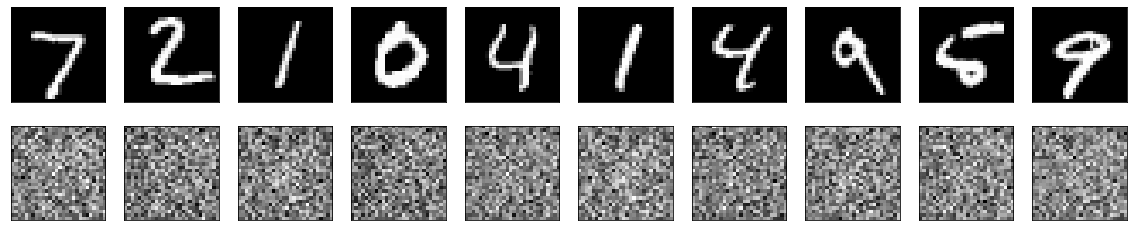

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()








(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 7s 24ms/step - loss: 0.6961 - val_loss: 0.6960
Epoch 2/50
235/235 [==============================] - 5s 20ms/step - loss: 0.6959 - val_loss: 0.6958
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6956 - val_loss: 0.6956
Epoch 4/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6954 - val_loss: 0.6954
Epoch 5/50
235/235 [==============================] - 4s 15ms/step - loss: 0.6952 - val_loss: 0.6952
Epoch 6/50
235/235 [==============================] - 4s 15ms/step - loss: 0.6951 - val_loss: 0.6950
Epoch 7/50
235/235 [==============================] - 4s 15ms/step - loss: 0.6949 - val_loss: 0.6948
Epoch 8/50
235/235 [==============================] - 3s 15ms/step - loss: 0.6947 - val_loss: 0.6946
Epoch 9/50
235/235 [==============================] - 4s 18ms/step - loss: 0.6945 - val_loss: 0.6945
Epoch 10/50
235/235 [==============================] - 4s 16ms/st

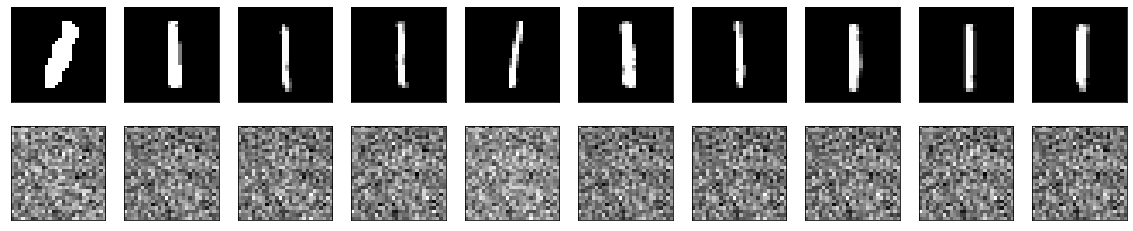

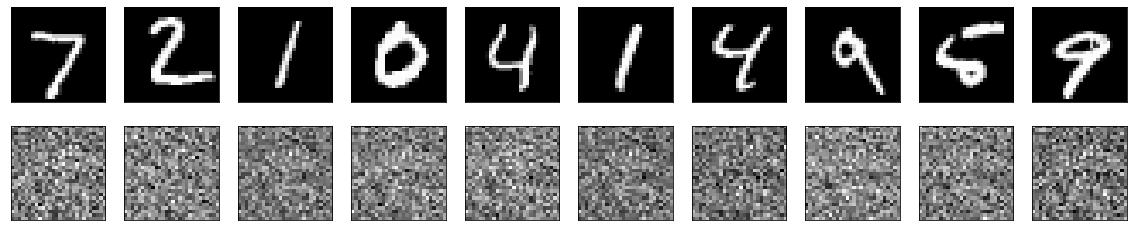

In [28]:
from keras.layers import Input, Dense
from keras.models import Model
# this is the size of our encoded representations
encoding_dim = 32 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
autoencoder.fit(x_train, x_train,
epochs=50,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# calculating difference(absolute) in test images
diff = np.absolute(x_test-decoded_imgs)
# summing the difference
diff = np.sum(diff, axis = 1)
print(diff.shape)
# finding the top 10 max difference
indices = np.argsort(diff)
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt
n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
  # for reversed
  j = indices[len(indices)-1-i]
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[j].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[j].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

